### <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 8: Pre-class Assignment: Modeling with Ordinary Differential Equations

<img src="https://static1.squarespace.com/static/59e802b9be42d61a159cbf16/5adfb43d6d2a737eeb53231a/5adfb45870a6ad380a74f016/1524612324412/Photo+Apr+17%2C+6+23+00+PM+%281%29.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for today's pre-class assignment
In this assignment, you will:

* Recall some of the things you learned in your Calc I course (derivatives and limits).
* Build on that knowledge to allow you to be able to understand and solve simple differential equations. (Don't panic if you have not yet taken a course on differential equations! We'll cover all of the things you need to know to develop the models for this assignment and other upcoming assignments.)
* Explore how you can use functions to define derivatives that model the evolution of a physical system.
* Review how loops can be used to update the state of an evolving system.
* Use <code>matplotlib</code> to plot the evolution of the system.
* Use NumPy when necessary to manipulate arrays or perform mathematical operations

### Assignment instructions

In this assignment you're going to watch a series of videos that walk you through what Ordinary Different Equations (ODEs) are and how you can use them to model physical systems. This will begin our foray into the world of computational modeling!

Although this assignment looks like a lot at first glance, the bulk of your time will be spent watching the videos. You'll then take what you learn and make minor modifications to provided code. That said, make sure you give yourself enough to watch the videos as the information presented will be useful more than once in this course!

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the "Pre-class assignments" submission folder for Day 8.  Submission instructions can be found at the end of the notebook.

---

___
## Role of ODEs in Computational Modeling

It is an obvious statement that we very often use equations in computational modeling. It is also an obvious statement that many interesting things we wish to model involve things that are changing:
* changing in time
* changing in space
* changing minds
* changing strategies
* changing numbers (of people,  molecules, stars, etc.)
* changing stock prices
* you get the idea.....

In mathematics, the way we describe change is with calculus and derivatives in particular. When an equation has a derivative in it, it is called a "[differential equation](https://en.wikipedia.org/wiki/Differential_equation)" (as opposed to, say, an algebraic equation). We'll keep it simple here and only consider what are called "[ordinary differential equations](https://en.wikipedia.org/wiki/Differential_equation#Ordinary_differential_equations)" (ODEs), because who would want to think about abnormal differential equations? ;^)

The types of equations can be used to model many diferent systems and in this assignment we'll see how they can be used to model the free-fall of a skydiver. 

So, here is the plan for the next week and a half. 

* In this pre-class you will learn the basics of differential equations and how they can be solved in Python.
* In the next in-class assignment you will apply what you've learned to model the motion of a bungee jumper. 
* Then, next week we will start a new topic of _Compartmental Modeling_. That week nearly everything we do will use [`odeint`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.integrate.odeint.html); we want you to be very good at `odeint` by the end of this week so that you can focus on modeling. You will model rumors, infectious diseases, weather, zombies, ecology and viral infections. 

Your first task is to watch the following video. This video will introduce you to what differential equations are and how they can be used to model the motion of a skydiver. 

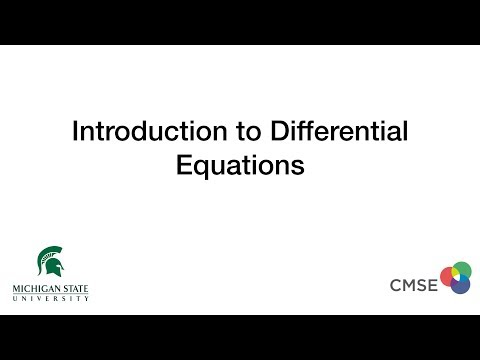

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("8QeCQn7uxnE",width=640,height=360)

**Question**: Explain in your own words what differential equations are and how they can be used to model a physical system.

It is a snapshot of the rate of change at a given moment with respect to a variable. They allow to model physical systems that do not have constant rates of changes. This encompasses most physical systems.

---
# Modeling the motion of a skydiver

Now you're going to watch a video that walks you through the process of using a set of differential equations and model the motion of a skydiver. Once you've watched the video, you'll modify the code from the video (provided below) to take into account air resistance.

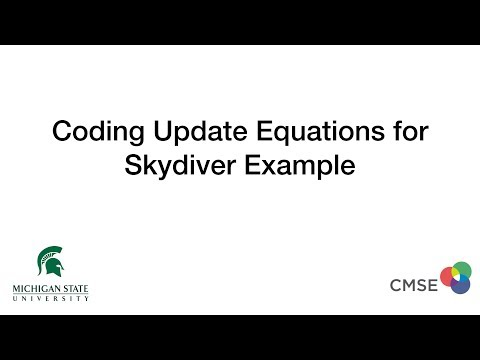

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("8MaorudJBgA",width=640,height=360)

---
## Review of the model for a falling skydiver without air resistance

**The following information provides a recap of the content discussed in the video so that you don't have constantly jump back and forth in the video.**

For simplicity, we're going to model this problem in only one dimension. We'll define this dimension to be "height," which we'll call "$h$".

We know that the **change in height** over some **change in time** is the **velocity** of the sky-diver, which we can write as:

$$ \frac{dh}{dt} = v$$

where we can think of **dh** as some small change in the height and **dt** is some small change in time. 

Similarly, a **change in velocity** over **change in time** is the **acceleration**, which we can write as:

$$ \frac{dv}{dt} = a$$

Now, if we combine these equations with the **initial conditions** of the skydiver, we have what is often referred to as an **initial value problem**.

If we want to solve this system **numerically**, one way that we can do it is to use a set of **"update equations"**, that allow us to move the skydiver from one point in time to another. The simplest set of update equations we can use are the following:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

and since we know that $\frac{dh}{dt} = v$ and $\frac{dv}{dt} = a$, we can also write these equations this way:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + v~\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + a~\Delta t$$

#### What else do we need to know to solve this this problem?

Do we know what the initial conditions are? Do we know what the value of the acceleration, $a$, is?

We first will begin by assuming: 

* $h_0 = 3000$ meters
* $v_0 = 0$ meters/second
* $g = -9.81$ gravity: meters/second^2
* $t_{max} = 30$ falling duration: seconds
* $dt = 1$ timestep

**The following code is the same code from the video you watched above. This code numerically solves for the motion of the skydiver and plots the result. Review each line of code an make sure you understand what it's doing and then execute the code.**

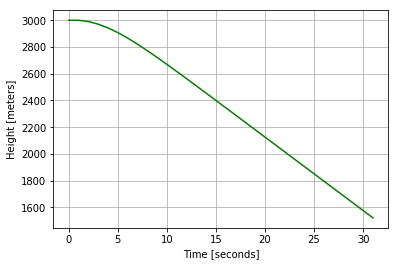

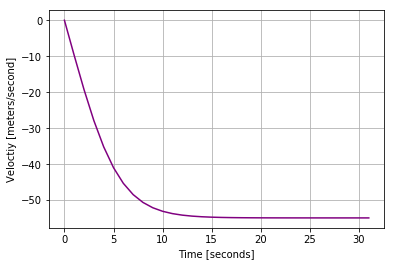

In [4]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Initialize variables
h = 3000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 1 # timestep
area = 0.4 #m^2
mass = 80 #kg
a = 0 #m/s^2



# Initialize lists for storing data
height = []
velocity = []
time = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)

# Create a function to compute derivaives of velocity and height
def derivs(v,g):
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is acceleration (gravity in this e.g.)
    dvdt = g
    
    return dhdt, dvdt

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Compute the acceleration at the given timestep
    a_g = dvdt
    a_air = (-0.65 * area * v * abs(v))/mass
    a = a_g + a_air
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + a*dt # new velocity MODIFY ME!!!
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

**Question:** If you want the model to stop when the skydiver hits the ground (going far too fast at the moment!), how might you build that into the model?

You could put in an if statement to see if the height ever reaches 0. If it does, either break immediately out of the while loop or stop calculating values.

---
## Adding air resistance to the model

As we can see from our plots above, without air resistance the skydiver continously accelerates under the force of gravity. If they start high enough, they could reach *very high* velocities!  In reality, we know that this isn't how skydiving works, eventually the skydiver reaches what we call **terminal velocity**, which is the point at which the acceleration due to gravity is balanced by the acceleration due to air resistance, or drag, which opposes the motion of the skydiver.

The acceleration due to friction with the air acts to slow down skydiver and is dependent on the skydiver's velocity. It is defined to be:

$$a_{\mathrm{air}} = \frac{-0.65~A~v~\left|v\right|}{m}$$

In this equation, $A$ is the projected area of the skydiver, $\left|v\right|$ is the absolute value of the velocity, and the $m$ is the mass of skydiver. When computing the *total* acceleration of the skydiver, we need to combine both the acceleration due to gravity *and* the acceleration due to air resistance. That makes the total acceleration:

$$a_{\mathrm{total}} = a_{\mathrm{gravity}} + a_{\mathrm{air}}$$

As before, you are going to **model the free-fall of the sky-diver for a total of 30 seconds**, but now you need to take into account air resistance. You can assume that the projected area of the skydiver is **0.4 m$^2$** and their mass is **80 kg**. Also assume that the skydiver is jumping out of a helicopter at **an initial height of 2000 m** and use **a new timestep size of 0.1 seconds**.

Ideally, you should find that eventually the skydiver approaches a constant velocity when the acceleration due to gravity is matched by the acceleration due to friction. 

**Modify the above code** (don't write new code from scratch!) to account for air resistance in the model while using the provided area of the skydiver and the new initial height. Make sure that your new plots make sense. You should see that the velocity flattens out to a constant value, the terminal velocity. If you can, create a list to store the acceleration and make a plot of that as well.

**Question**: Based on your results, what does the terminal velocity of the skydiver appear to be?

The terminal velocity seems to be around -55 m/s.

---
## Modeling the falling skydiver using ODEINT

As with many computational models, there is often more than one way to find a solution. In fact, Python has a software library called SciPy that includes a tool for solving sets of differential questions called `odeint`.

Watch the following video to learn how we can use this tool to model the motion of the skydiver. The SciPy documentation highlighted in the video can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

**Note**: The narrator of this video mistakenly mixes up the dependent/independent variables in the problem when discussing the solution. For the ODEs used in the sky-diver example, *time* ($t$) is the independent variable and the *height* is the dependent variable.

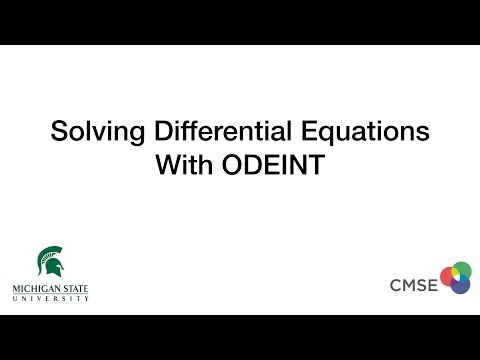

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("QteGO3E0tZg",width=640,height=360)

---
## Reviewing the ODEINT solution for the skydiver problem.

The code below is the same code used in the video to model the skydiver using the SciPy `odeint` tool. **Review the code and make sure you understand each line then execute the code.**

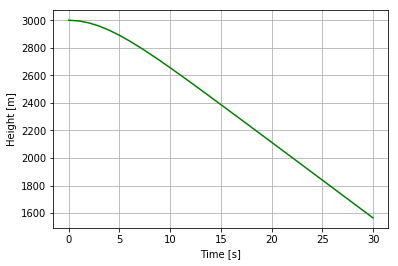

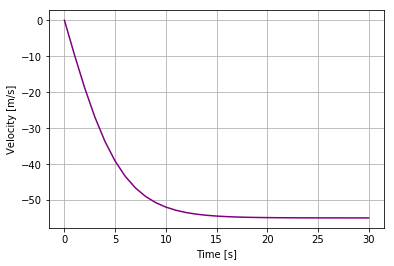

In [9]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint # This one is new to you!

# Derivative function
def derivs(curr_vals, time):
    
    # Declare parameters
    a_g = -9.81 # m/s^2
    mass = 80 #kg
    area = 0.4 #m^2
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Modification of the acceleration to accomadate air resistance.
    a_air = (-0.65 * area * v * abs(v))/mass
    a = a_g + a_air
    
    # Right-hand side of odes, which are used to computer the derivative
    dhdt = v
    dvdt = a
    
    return dhdt, dvdt

# Declare Variables for initial conditions
h0 = 3000 # meters
v0 = 0 # m/s
tmax = 30 # seconds
dt = 1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with odeint
sol = odeint(derivs, init, time)

# Plot the results using the values stored in the solution variable, "sol"

# Plot the height using the "0" element from the solution
plt.figure(1)
plt.plot(time, sol[:,0],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the "1" element from the solution
plt.figure(2)
plt.plot(time, sol[:,1],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

---
## Adding air resistance to the ODEINT solution

Now you're going to **modify the provided code that uses `odeint`** to include air resistance **using the same parameters you used when you added air resistance previously**. Make sure that the solution is computed for **30 seconds** of skydiver freefall time and ensure that you get plots that look similar to your previous solution. Don't worry about trying to plot the acceleration for this part of the assignment.

**Question**: Do your plots of the height and velocity of the skydiver from `odeint` agree with your solution when you used the update equations?

Yes, although I had to modify the code to iterate through 30 seconds of time, not 10.

---
### Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [10]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the submission link for Day 8, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees